# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

<font size = 5 color = 'red'><b> USE ALL THE POWERS FROM 1 TO N FOR DEGREE > 1 </b></font>
# CHECK INSTRUCTIONS FROM VIDEO

# Import Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
tmp = np.array([1., 2., 3.])
tmp_cubed = tmp**3
print(tmp)
print(tmp_cubed)

[1. 2. 3.]
[ 1.  8. 27.]


# Polynomial_dataframe function

Complete the following function to create an **Pandas DataFrame** consisting of the powers of an **Numpy Array** up to a specific degree:

In [3]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature ** power # used feature**power as 'numpy.ndarray' object has no attribute 'apply'
            
    return poly_dataframe

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [4]:
print(polynomial_dataframe(tmp, 3))

   power_1  power_2  power_3
0      1.0      1.0      1.0
1      2.0      4.0      8.0
2      3.0      9.0     27.0


# Visualizing polynomial regression


Let's use matplotlib to visualize what a polynomial regression looks like on some real data.

IMPORTANT: use the following types for columns when importing the csv files. Otherwise, they may not be imported correctly: [str, str, float, float, float, float, int, str, int, int, int, int, int, int, int, int, str, float, float, float, float]. If your tool of choice requires a dictionary of types for importing csv files (e.g. Pandas), use:


In [5]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 
              'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 
              'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [6]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [7]:
sales = sales.sort_values(['sqft_living','price'])

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [8]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [9]:
# Create Linear Regression Model
reg1 = LinearRegression()

# Fit the Model to the data
model1 = reg1.fit(np.array(poly1_data['power_1']).reshape(-1,1),poly1_data['price'])

In [10]:
# let's take a look at the weights before we plot
model1.intercept_, model1.coef_

(-43580.743094473844, array([280.6235679]))

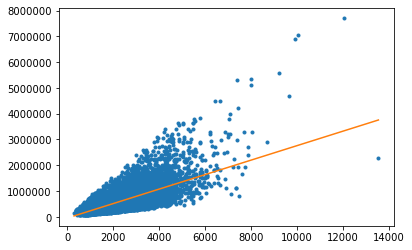

In [11]:
# Visualizing the Linear Regression Model with polynomial degree of 1
plt.plot(np.array(poly1_data['power_1']).reshape(-1,1),poly1_data['price'],'.',
        np.array(poly1_data['power_1']).reshape(-1,1), reg1.predict(np.array(poly1_data['power_1']).reshape(-1,1)),'-')


Let's unpack that plt.plot() command. The first pair of **Numpy Arrays** we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [12]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price'] # add price to the data since it's the target
my_features2 = poly2_data.iloc[:,:-1] # get the values of the features

# Create Linear Regression Model
reg2 = LinearRegression()

# Fit the Model to the data
model2 = reg2.fit(my_features2,poly2_data['price'])

In [13]:
my_features2

,power_1,power_2
19452,290.0,84100.0
15381,370.0,136900.0
860,380.0,144400.0
18379,384.0,147456.0
4868,390.0,152100.0
...,...,...
8092,9640.0,92929600.0
9254,9890.0,97812100.0
3914,10040.0,100801600.0
7252,12050.0,145202500.0


In [14]:
model2.intercept_, model2.coef_

(199222.27930548415, array([6.79940947e+01, 3.85812609e-02]))

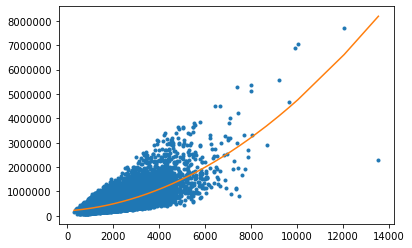

In [15]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], reg2.predict(my_features2),'-')

In [16]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
my_features3 = poly3_data['power_2'] # get the values of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target


# Create Linear Regression Model
reg3 = LinearRegression()

# Fit the Model to the data
model3 = reg3.fit(np.array(my_features3).reshape(-1,1),poly3_data['price'])

model3.intercept_, model3.coef_

(284745.4530834366, array([0.04939429]))

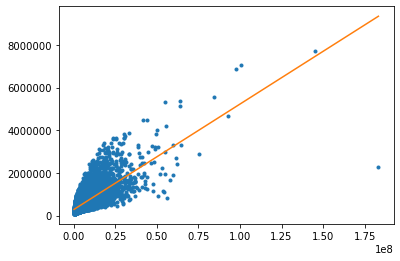

In [17]:
plt.plot(poly3_data['power_2'],poly3_data['price'],'.',
        poly3_data['power_2'], reg3.predict(np.array(my_features3).reshape(-1,1)),'-')

Now try a 15th degree polynomial:

In [18]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
my_features15 = poly15_data['power_15']# get the values of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target


# Create Linear Regression Model
reg15 = LinearRegression()

# Fit the Model to the data
model15 = reg15.fit(np.array(my_features15).reshape(-1,1),poly15_data['price'])

model15.intercept_, model15.coef_

(539916.0116039165, array([3.26446697e-56]))

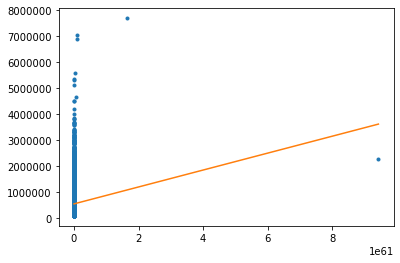

In [19]:
plt.plot(poly15_data['power_15'],poly15_data['price'],'.',
        poly15_data['power_15'], reg15.predict(np.array(my_features15).reshape(-1,1)),'-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

# Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

**Note : Since this notebook uses pandas instead of turicreate, the sets are loaded from csv files provided for this programming assignment**

In [20]:
# Loading the set_1, set_2, set_3 and set_4 datasets from the csv files
set_1 = pd.read_csv('wk3_kc_data/wk3_kc_house_set_1_data.csv')
set_2 = pd.read_csv('wk3_kc_data/wk3_kc_house_set_2_data.csv')
set_3 = pd.read_csv('wk3_kc_data/wk3_kc_house_set_3_data.csv')
set_4 = pd.read_csv('wk3_kc_data/wk3_kc_house_set_4_data.csv')

# Loading the train, validation and test sets from the csv files
train = pd.read_csv('wk3_kc_data/wk3_kc_house_train_data.csv')
validate = pd.read_csv('wk3_kc_data/wk3_kc_house_valid_data.csv')
test = pd.read_csv('wk3_kc_data/wk3_kc_house_test_data.csv')

# Loading the train valid shuffled dataset from csv
train_validate_shuffled = pd.read_csv('wk3_kc_data/wk3_kc_house_train_valid_shuffled.csv')

Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.

In [21]:
'''Estimating 15th degree polynomial on the set_1'''

set_1_data = polynomial_dataframe(set_1['sqft_living'], 15)
set_1_features = set_1_data['power_15']# get the values of the features
set_1_data['price'] = set_1['price'] # add price to the data since it's the target

# Create Linear Regression Model.
reg1 = LinearRegression()

# Fit the Model to the set_1 data
model_set_1 = reg1.fit(np.array(set_1_features).reshape(-1,1),set_1_data['price'])

print('Model 1 (set_1) \n Intercept : ', model_set_1.intercept_, '\t Coefficients : ', model_set_1.coef_)



'''Estimating 15th degree polynomial on the set_2'''

set_2_data = polynomial_dataframe(set_2['sqft_living'], 15)
set_2_features = set_2_data['power_15'] # get the values of the features
set_2_data['price'] = set_2['price'] # add price to the data since it's the target

# Create Linear Regression Model.
reg2 = LinearRegression()

# Fit the Model to the set_2 data
model_set_2 = reg2.fit(np.array(set_2_features).reshape(-1,1),set_2_data['price'])

print('\n\nModel 2 (set_2) \n Intercept : ', model_set_2.intercept_, '\t Coefficients : ', model_set_2.coef_)



'''Estimating 15th degree polynomial on the set_3'''

set_3_data = polynomial_dataframe(set_3['sqft_living'], 15)
set_3_features = set_3_data['power_15'] # get the values of the features
set_3_data['price'] = set_3['price'] # add price to the data since it's the target

# Create Linear Regression Model.
reg3 = LinearRegression()

# Fit the Model to the set_3 data
model_set_3 = reg3.fit(np.array(set_3_features).reshape(-1,1),set_3_data['price'])

print('\n\nModel 3 (set_3) \n Intercept : ', model_set_3.intercept_, '\t Coefficients : ', model_set_3.coef_)



'''Estimating 15th degree polynomial on the set_4'''

set_4_data = polynomial_dataframe(set_4['sqft_living'], 15)
set_4_features = set_4_data['power_15'] # get the values of the features
set_4_data['price'] = set_4['price'] # add price to the data since it's the target

# Create Linear Regression Model.
reg4 = LinearRegression()

# Fit the Model to the set_4 data
model_set_4 = reg4.fit(np.array(set_4_features).reshape(-1,1),set_4_data['price'])

print('\n\nModel 4 (set_4) \n Intercept : ', model_set_4.intercept_, '\t Coefficients : ', model_set_4.coef_)

Model 1 (set_1) 
 Intercept :  547573.3505728449 	 Coefficients :  [-2.98227854e-15]


Model 2 (set_2) 
 Intercept :  538573.0681009977 	 Coefficients :  [-2.02672346e-15]


Model 3 (set_3) 
 Intercept :  543542.8576406145 	 Coefficients :  [-3.86933012e-15]


Model 4 (set_4) 
 Intercept :  534235.5302452781 	 Coefficients :  [-3.40587864e-15]


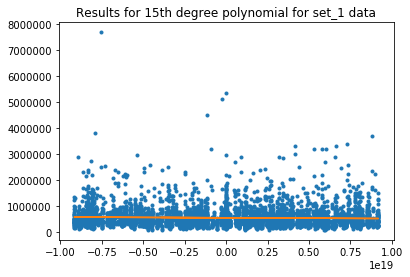

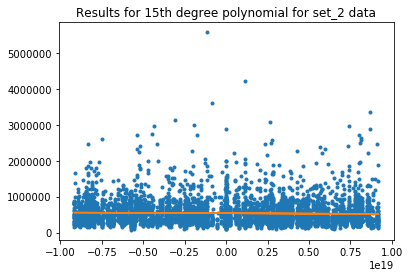

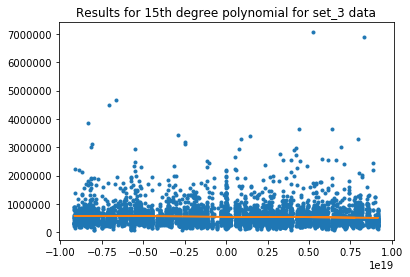

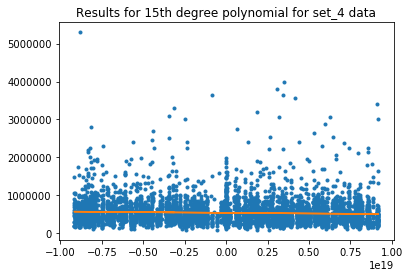

In [22]:
# Plotting the results for set_1 data
plt.plot(set_1_data['power_15'],set_1_data['price'],'.',
        set_1_data['power_15'], reg1.predict(np.array(set_1_features).reshape(-1,1)),'-')
plt.title('Results for 15th degree polynomial for set_1 data')
plt.show()

# Plotting the results for set_2 data
plt.plot(set_2_data['power_15'],set_2_data['price'],'.',
        set_2_data['power_15'], reg2.predict(np.array(set_2_features).reshape(-1,1)),'-')
plt.title('Results for 15th degree polynomial for set_2 data')
plt.show()

# Plotting the results for set_3 data
plt.plot(set_3_data['power_15'],set_3_data['price'],'.',
        set_3_data['power_15'], reg3.predict(np.array(set_3_features).reshape(-1,1)),'-')
plt.title('Results for 15th degree polynomial for set_3 data')
plt.show()

# Plotting the results for set_4 data
plt.plot(set_4_data['power_15'],set_4_data['price'],'.',
        set_4_data['power_15'], reg4.predict(np.array(set_4_features).reshape(-1,1)),'-')
plt.title('Results for 15th degree polynomial for set_4 data')
plt.show()


# The code below is to answer the following quiz question
coeff_power15_list = [model_set_1.coef_, model_set_2.coef_, model_set_3.coef_, model_set_4.coef_]

if model_set_1.coef_ > 0 and model_set_2.coef_ > 0 and model_set_3.coef_ > 0 and model_set_4.coef_ > 0 :
    same_coef = 'The sign for power_15 is the same, i.e. positive for all four models'
    
elif model_set_1.coef_ < 0 and model_set_2.coef_ < 0 and model_set_3.coef_ < 0 and model_set_4.coef_ < 0 :
    same_coef = 'The sign for power_15 is the same, i.e. negative for all four models'
    
else :
    same_coef = 'The sign for power_15 is the not the same all four models'

<font color = 'steelblue'><b> Quiz 1 : Is the sign (positive or negative) for power_15 the same in all four models? </b></font>

<font color = 'mediumvioletred'><b> Answer 1 : {{same_coef}} </b></font>

<br/>

<font color = 'steelblue'><b>Quiz 2 : True/False the plotted fitted lines look the same in all four plots? </b></font>

<font color = 'mediumvioletred'><b> Answer 2 : True </b></font>

Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. Since this notebook uses pandas, the train, validate and test sets loaded earlier using provided csv files are used.

Now for each degree from 1 to 15:

* Build an polynomial data set using training_data[‘sqft_living’] as the feature and the current degree
* Add training_data[‘price’] as a column to your polynomial data set
* Learn a model on TRAINING data to predict ‘price’ based on your polynomial data set at the current degree
* Compute the RSS on VALIDATION for the current model (print or save the RSS)

In [23]:
# Create a list for RSS for all the models
RSS_LIST = []

for i in range(1,16) :
    train_data = polynomial_dataframe(train['sqft_living'], i)
    train_data['price'] = train['price'] # add price to the data since it's the target
    features_train = train_data.iloc[:,:-1] # get the values of the features only while excluding the price column
    train_features = features_train.iloc[:,-1] # use the ith degree polynomial as the feature
    

    # Create Linear Regression Model
    reg = LinearRegression()

    # Fit the Model to the data
    model = reg.fit(np.array(train_features).reshape(-1,1),train_data['price'])

    print('Polynomial Degree ', i, ':')
    print('Intercept : ',model.intercept_, '\t\tCoefficient : ', model.coef_)
    
    
    validate_data = polynomial_dataframe(validate['sqft_living'], i)
    validate_data['price'] = validate['price'] # add price to the data since it's the target
    features_validate = validate_data.iloc[:,:-1] # get the values of the features only while excluding the price column
    validate_features = features_validate.iloc[:,-1] # use the ith degree polynomial as the feature
        
    predictions = np.array(reg.predict(np.array(validate_features).reshape(-1,1)))
    
    # Calculate the residuals as done in Week 1
    residuals = predictions - validate['price']

    # Square the residuals and add them up
    RSS = np.sum(np.square(residuals))
    
    # Append the RSS for all the models into list
    RSS_LIST.append(RSS)
    
    print('Residual Sum Square : ', RSS, '\n\n')
    

print('RSS List : \n', np.array(RSS_LIST).reshape(-1,1))

# Find the model with the smallest RSS.
Min_RSS = RSS_LIST.index(min(RSS_LIST))

print('\n\nDegree ', str(Min_RSS), ' has the smallest RSS : ', min(RSS_LIST))
    

Polynomial Degree  1 :
Intercept :  -59493.317165209795 		Coefficient :  [288.59846375]
Residual Sum Square :  629097886299585.8 


Polynomial Degree  2 :
Intercept :  269035.08999308693 		Coefficient :  [0.05249265]
Residual Sum Square :  624313295759912.9 


Polynomial Degree  3 :
Intercept :  423930.5909367404 		Coefficient :  [7.61368678e-06]
Residual Sum Square :  942092101029057.2 


Polynomial Degree  4 :
Intercept :  502148.08069434605 		Coefficient :  [7.18476941e-10]
Residual Sum Square :  1334829135014751.0 


Polynomial Degree  5 :
Intercept :  505748.82293135126 		Coefficient :  [2.25729148e-13]
Residual Sum Square :  1124693076313347.1 


Polynomial Degree  6 :
Intercept :  544153.884178582 		Coefficient :  [-3.20892282e-15]
Residual Sum Square :  1219825421620800.0 


Polynomial Degree  7 :
Intercept :  543749.0948902766 		Coefficient :  [1.82640469e-15]
Residual Sum Square :  1222583471905205.0 


Polynomial Degree  8 :
Intercept :  543169.0153422875 		Coefficient :  [-

<font color = 'steelblue'><b> Quiz : Which degree (1, 2, …, 15) had the lowest RSS on Validation data? </b></font>

<font color = 'mediumvioletred'><b> Answer : Degree {{Min_RSS}} has the lowest RSS on Validation data </b></font>

Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

In [24]:
test_data = polynomial_dataframe(test['sqft_living'], i)
test_data['price'] = test['price'] # add price to the data since it's the target
features_test = test_data.iloc[:,:-1] # get the values of the features only while excluding the price column
test_features = features_test.iloc[:,-1] # use the ith degree polynomial as the feature
    

# Create Linear Regression Model
reg_test = LinearRegression()

# Fit the Model to the data
model_test = reg_test.fit(np.array(test_features).reshape(-1,1),test_data['price'])

validate_data = polynomial_dataframe(validate['sqft_living'], 1)
validate_data['price'] = validate['price'] # add price to the data since it's the target
features_validate = validate_data.iloc[:,:-1] # get the values of the features only while excluding the price column
validate_features = features_validate.iloc[:,-1] # use the ith degree polynomial as the feature
        
predictions_test = np.array(reg_test.predict(np.array(validate_features).reshape(-1,1)))
    
# Calculate the residuals as done in Week 1
residuals_test = predictions_test - validate['price']

# Square the residuals and add them up
RSS_test = np.sum(np.square(residuals_test))

print(RSS_test)

1222312500155603.5


<font color = 'steelblue'><b> Quiz : What is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question) </b></font>

<font color = 'mediumvioletred'><b> Answer : RSS on TEST set for model with degree seleted from Validation data is : {{RSS_test}} </b></font>